In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
td=pd.read_csv('titanic_data.csv.xls')

In [3]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
td['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

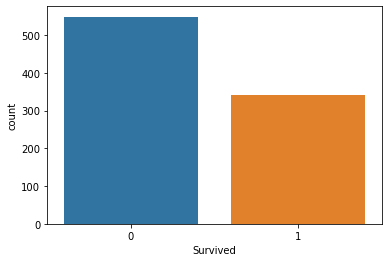

In [5]:
sns.countplot(x='Survived',data=td)
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

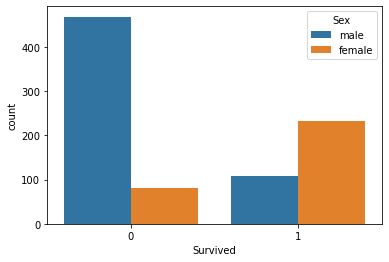

In [6]:
sns.countplot(x='Survived',data=td,hue='Sex')

In [7]:
#checking of the null values in the dataset 
td.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [8]:
td.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
td.isnull().sum().sum()

866

In [10]:
td['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [11]:
td['Age'].fillna((td['Age'].mean()),inplace=True)

In [12]:
td.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
td.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
td=td[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']]
td.shape

(891, 8)

In [15]:
 td.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [16]:
td.dropna(inplace=True)

In [17]:
 td.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [18]:
td_x = td[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
td_y = td[['Survived']]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(td_x, td_y, test_size=0.2, random_state=42)

In [21]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((711, 7), (178, 7), (711, 1), (178, 1))

<AxesSubplot:xlabel='Age', ylabel='Density'>

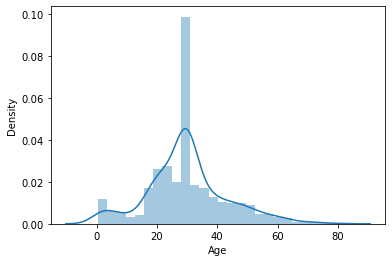

In [22]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.distplot(X_train['Age'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

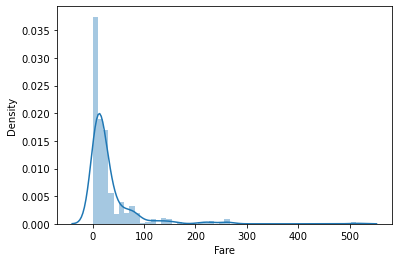

In [23]:
sns.distplot(X_train['Fare'])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

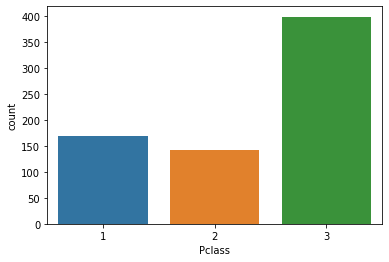

In [24]:
sns.countplot(x = 'Pclass', data=X_train)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
age_scaler = StandardScaler()
age_scaler.fit(pd.DataFrame(X_train['Age']))

StandardScaler()

In [27]:
X_train['Age'] = age_scaler.transform(X_train[['Age']])

In [28]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
708,1,female,-0.599636,0,0,151.5500,S
240,3,female,-0.012500,1,0,14.4542,C
382,3,male,0.162966,0,0,7.9250,S
792,3,female,-0.012500,8,2,69.5500,S
683,3,male,-1.209717,5,2,46.9000,S


<AxesSubplot:xlabel='Age', ylabel='Density'>

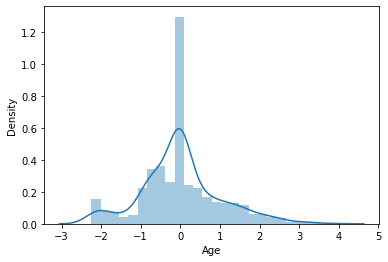

In [29]:
sns.distplot(X_train['Age'])

In [30]:
fare_scaler = StandardScaler()
fare_scaler.fit(pd.DataFrame(X_train['Fare']))

StandardScaler()

In [31]:
X_train['Fare'] = fare_scaler.transform(X_train[['Fare']])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

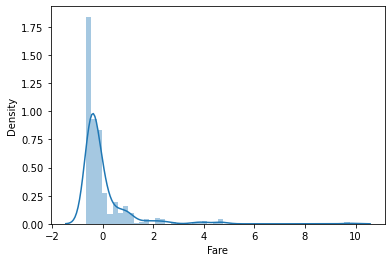

In [32]:
sns.distplot(X_train['Fare'])

In [33]:
X_train.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [34]:
X_train['Sex'].value_counts()

male      472
female    239
Name: Sex, dtype: int64

In [35]:
X_train['Sex'] = X_train['Sex'].map({'female':0, 'male':1})

In [36]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
708,1,0,-0.599636,0,0,2.430597,S
240,3,0,-0.012500,1,0,-0.358135,C
382,3,1,0.162966,0,0,-0.490949,S
792,3,0,-0.012500,8,2,0.762595,S
683,3,1,-1.209717,5,2,0.301860,S


In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
embarked_encoder = LabelEncoder()
embarked_encoder.fit(pd.DataFrame(X_train['Embarked']))

LabelEncoder()

In [39]:
X_train['Embarked'] = embarked_encoder.transform(X_train[['Embarked']])

In [40]:
X_train['Embarked'].value_counts()

2    514
0    132
1     65
Name: Embarked, dtype: int64

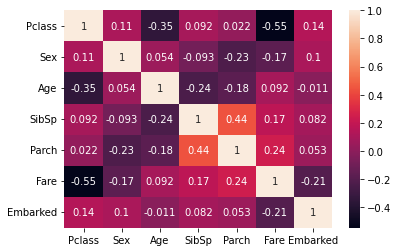

In [41]:
# checking of the correlation of the features
sns.heatmap(X_train.corr(), annot=True)
plt.show()

In [42]:
del X_train['Pclass']

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
X_train_original = X_train
X_train = X_train.values
Y_train = Y_train.values

In [45]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)

LogisticRegression()

In [46]:
coefficient = pd.concat([pd.DataFrame(X_train_original.columns),
                        pd.DataFrame(np.transpose(logistic_regression.coef_))], axis=1)

In [47]:
coefficient

,0,0
0,Sex,-2.503075
1,Age,-0.299958
2,SibSp,-0.426579
3,Parch,-0.193825
4,Fare,0.742928
5,Embarked,-0.258051


In [49]:
coefficient.columns = ['Features', 'coefficients']
coefficient

,Features,coefficients
0,Sex,-2.503075
1,Age,-0.299958
2,SibSp,-0.426579
3,Parch,-0.193825
4,Fare,0.742928
5,Embarked,-0.258051


In [50]:
logistic_regression.intercept_[0]

1.8064527331294575

In [51]:
coefficient = coefficient.append({'Features':'Intercept', 'coefficients':logistic_regression.intercept_[0]}, ignore_index=True)

In [52]:
def transform_data(test_data, age_scaler, fare_scaler, embarked_encoder):
    test_data['Sex'] = test_data['Sex'].map({'female':0, 'male':1})
    test_data['Age'] = age_scaler.transform(test_data[['Age']])
    test_data['Fare'] = fare_scaler.transform(test_data[['Fare']])
    test_data['Embarked'] = embarked_encoder.transform(test_data[['Embarked']])
    del test_data['Pclass']
    return test_data

In [53]:
X_test = transform_data(X_test, age_scaler, fare_scaler, embarked_encoder)

In [54]:
X_test.head()

,Sex,Age,SibSp,Parch,Fare,Embarked
281,1,-0.142075,0,0,-0.492389,2
435,0,-1.209717,1,2,1.788823,2
39,0,-1.209717,1,0,-0.423482,0
418,1,0.010446,0,0,-0.387716,2
585,0,-0.904676,0,2,0.968044,2


In [55]:
X_test = X_test.values
Y_test = Y_test.values

In [ ]:
Y_pred = logistic